In [1]:
import os
import numpy as np

# To plot figures
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = [25, 10]
dfmt = mdates.DateFormatter('%m/%d %H:%M:%S') # date format for x-axis ticks

# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
# Open the data file
with open("C:/ML/data.txt") as f:
    raw_data = f.readlines()
raw_data = [x.strip('\n') for x in raw_data]

print(raw_data[0])

1312182000,1322


In [3]:
# Check the number of records in the data file
len(raw_data)

2676545

In [4]:
# split every line by first occurence of space into (UTC Time, data)
data = [x.split(',', 1) for x in raw_data]
len(data)

2676545

In [5]:
print(data[0])
print(data[0][0])
print(data[0][1])

['1312182000', '1322']
1312182000
1322


In [6]:
# Extract power data and unix timestamp
Unix_Time = []
Power = []

for i in range(len(data)):
    Unix_Time.append(int(data[i][0]))
    Power.append(int(data[i][1]))

In [7]:
Unix_Time[0]

1312182000

In [8]:
Power[0]

1322

In [9]:
# Convert unix timestamp into PDT

from datetime import datetime
from pytz import timezone
import pytz

UTC_Time = []
PDT_Time = []
date_format = '%Y-%m-%d %H:%M:%S'
tz = timezone("US/Pacific")

for i in range(0,len(data)):
    #get UTC time from Unix time stamp
    UTC_Time.append(datetime.utcfromtimestamp(Unix_Time[i]).strftime(date_format))
    
    #get local time (in my case PDT) from Unix time stamp
    PDT_Time.append(datetime.fromtimestamp(Unix_Time[i]).strftime(date_format))


In [10]:
PDT_Time[0]

'2011-08-01 00:00:00'

### Plot total power consumption

In [11]:
dates = []
dates = [datetime.strptime(t, date_format) for t in PDT_Time]
dates[0]

datetime.datetime(2011, 8, 1, 0, 0)

15.292665004730225s


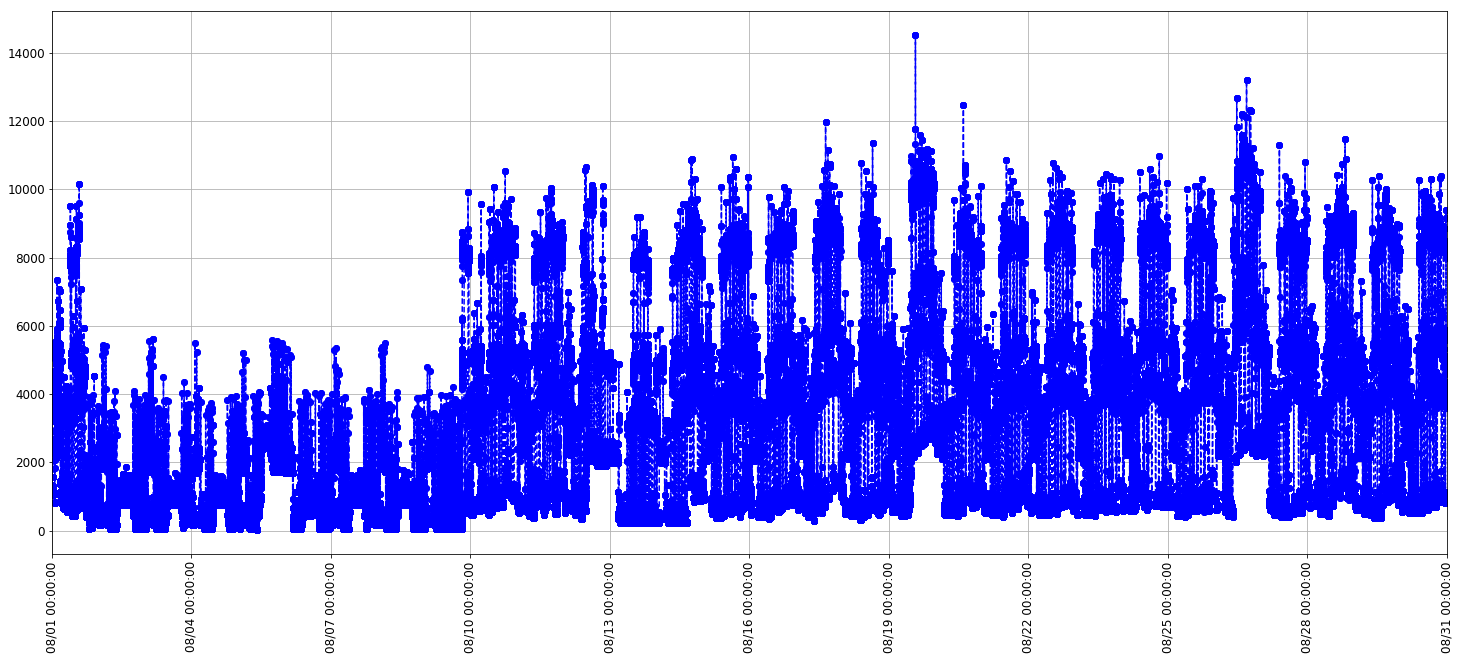

In [12]:
import datetime

import time
start = time.time() # start timer to measure execution time

fig, ax = plt.subplots()
plt.plot(dates, Power, linestyle='--', marker='o', color = 'blue')
plt.grid()
ax.set_xlim([datetime.datetime(2011, 8, 1, 0, 0, 0), datetime.datetime(2011, 8, 31, 0, 0, 0)])
#ax.set_ylim([0, 3000])
ax.xaxis.set_major_formatter(dfmt)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )
#ax.axhline(y=500, color='r')

end = time.time() # stop timer to measure execution time
print(str(end - start) + 's') 

### Detect power transitions by differencing the power time series
#### Subtract previous Power value from each Power value to get delta: positive delta corresponds to OFF-ON transition, negative delta corresponds to ON-OFF transition

In [13]:
import operator

Power_prev = []
Power_delta =[]

Power_prev = Power[:]
Power_prev.insert(0, Power[0]) #insert first element
del Power_prev[-1] #delete last element

# Power_delta = [i - j for i, j in zip(Power, Power_prev)]
Power_delta = list(map(operator.sub, Power, Power_prev)) # works faster than previous commented out line, though the list comprehension is a cleaner code

### Account for transient effects (overshoots/undershoots)
#### Subtract Power value (trans) seconds ago from each Power value to get delta_trans

In [14]:
import operator

# Define typical transient time in seconds - this is an important variable controlling the time period after which signal is sampled after transition!
trans = 30

Power_prev_trans = []
Power_delta_trans =[]

Power_prev_trans = Power[:]

# Shift list by (trans) elements, insert Power[i] as first (trans) elements, delete last (trans) elements
for i in range(trans-1,-1,-1):
    Power_prev_trans.insert(0, Power[i]) #insert first element
    del Power_prev_trans[-1] #delete last element

# Power_delta = [i - j for i, j in zip(Power, Power_prev)]
Power_delta_trans = list(map(operator.sub, Power, Power_prev_trans)) # works faster than previous commented out line, though the list comprehension is a cleaner code

for i in range(0, 2*trans):
    print(str(Power[i]) + ' ' + str(Power_prev_trans[i]) + ' ' + str(Power_delta_trans[i]))

1322 1322 0
1322 1322 0
1328 1328 0
1328 1328 0
1328 1328 0
1328 1328 0
1328 1328 0
1320 1320 0
1320 1320 0
1320 1320 0
1320 1320 0
1320 1320 0
1320 1320 0
1320 1320 0
1320 1320 0
1320 1320 0
1320 1320 0
1318 1318 0
1318 1318 0
1318 1318 0
1318 1318 0
1318 1318 0
1324 1324 0
1324 1324 0
1324 1324 0
1324 1324 0
1324 1324 0
1328 1328 0
1328 1328 0
1328 1328 0
1328 1322 6
1328 1322 6
1324 1328 -4
1324 1328 -4
1324 1328 -4
1324 1328 -4
1324 1328 -4
1336 1320 16
1336 1320 16
1336 1320 16
1336 1320 16
1336 1320 16
1326 1320 6
1326 1320 6
1326 1320 6
1326 1320 6
1326 1320 6
1328 1318 10
1328 1318 10
1328 1318 10
1328 1318 10
1328 1318 10
1326 1324 2
1326 1324 2
1326 1324 2
1326 1324 2
1326 1324 2
1322 1328 -6
1322 1328 -6
1322 1328 -6


14.174725770950317s


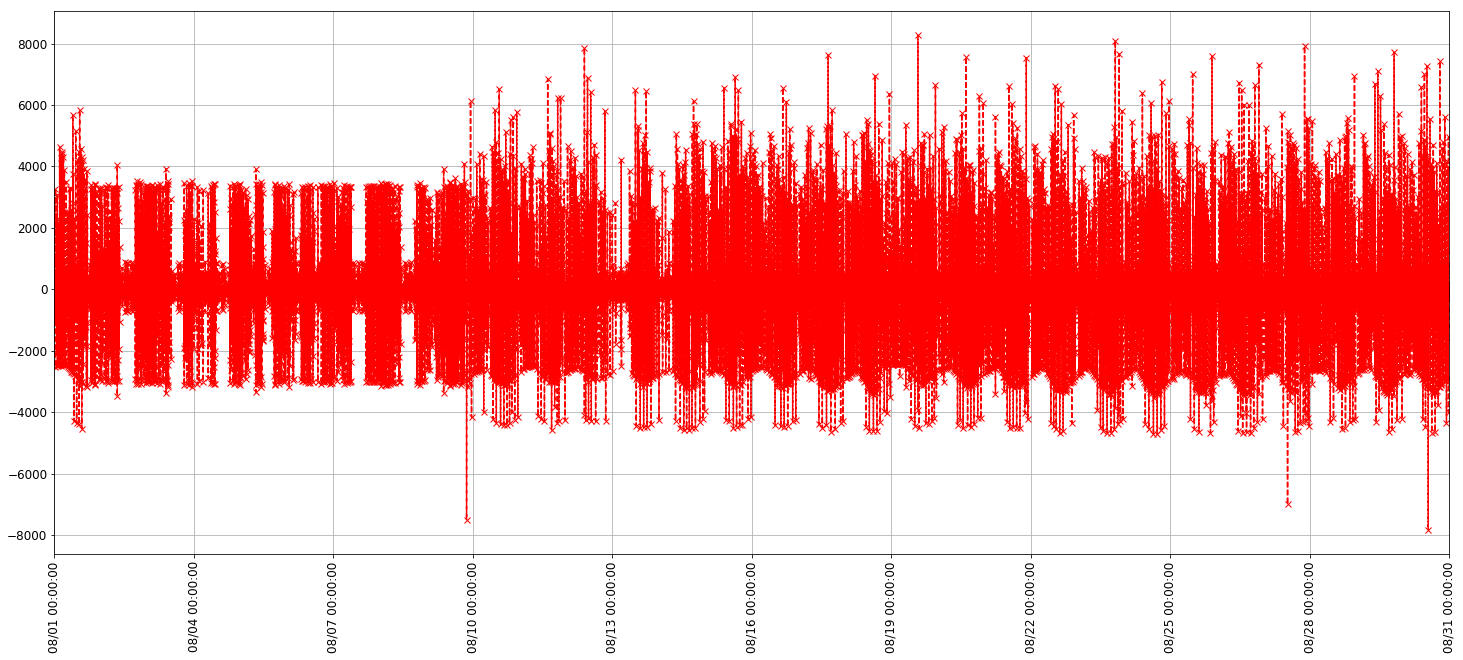

In [15]:
import time
start = time.time() # start timer to measure execution time

import datetime

fig, ax = plt.subplots()
#plt.plot(dates, Power, linestyle='--', marker='o', color = 'blue')
plt.plot(dates, Power_delta, linestyle='--', marker='x', color = 'red')
plt.grid()
ax.set_xlim([datetime.datetime(2011, 8, 1, 0, 0, 0), datetime.datetime(2011, 8, 31, 0, 0, 0)])
#ax.set_ylim([-14000, 14000])
ax.xaxis.set_major_formatter(dfmt)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )
#ax.axhline(y=500, color='r')

end = time.time() # stop timer to measure execution time
print(str(end - start) + 's') 

#### Observation: On plot above, OFF-ON transitions (positive delta) appear to be noisier than ON-OFF transitions (negative), perhaps, due to bigger capacitive/inductive overshoot effect of connecting a load (vs. disconnecting). Use ON-OFF and OFF-ON and post-transient transitions in analysis.

29.33099055290222s


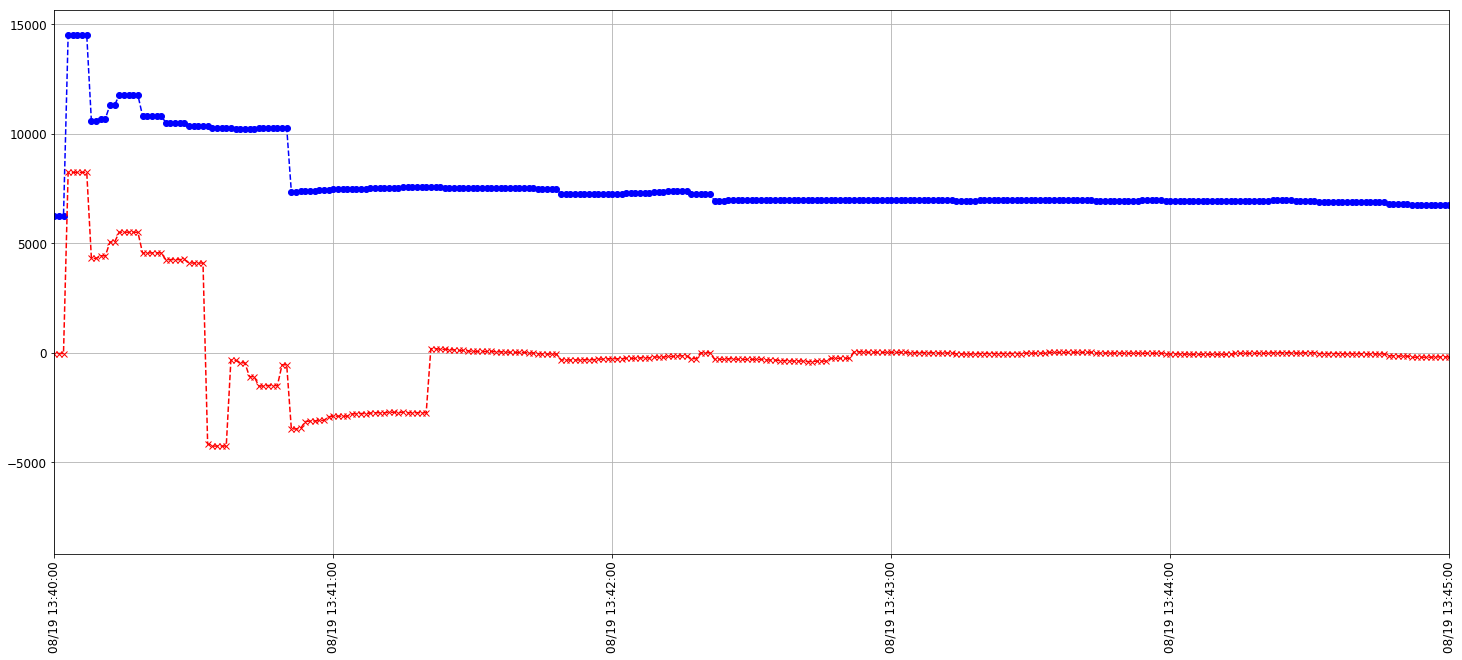

In [16]:
import time
start = time.time() # start timer to measure execution time

import datetime

fig, ax = plt.subplots()
plt.plot(dates, Power, linestyle='--', marker='o', color = 'blue')
plt.plot(dates, Power_delta_trans, linestyle='--', marker='x', color = 'red')
plt.grid()
ax.set_xlim([datetime.datetime(2011, 8, 19, 13, 40, 0), datetime.datetime(2011, 8, 19, 13, 45, 0)])
#ax.set_ylim([-14000, 14000])
ax.xaxis.set_major_formatter(dfmt)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )
#ax.axhline(y=500, color='r')

end = time.time() # stop timer to measure execution time
print(str(end - start) + 's') 

### Plot histograms of power transitions with and w/o transients for various ranges.

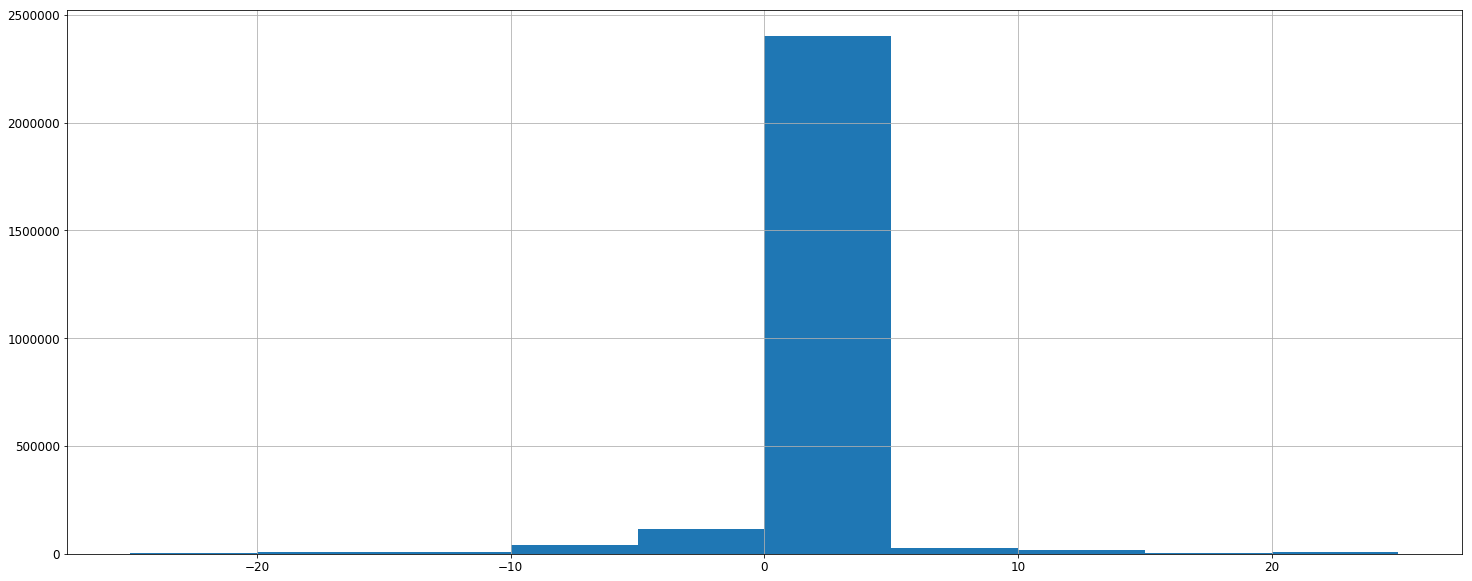

In [17]:
plt.hist(Power_delta, bins = 10 , range = (-25, 25))
plt.grid()

#### Observation (on plot above): A lot of < 5W transitions - most likely this is noise

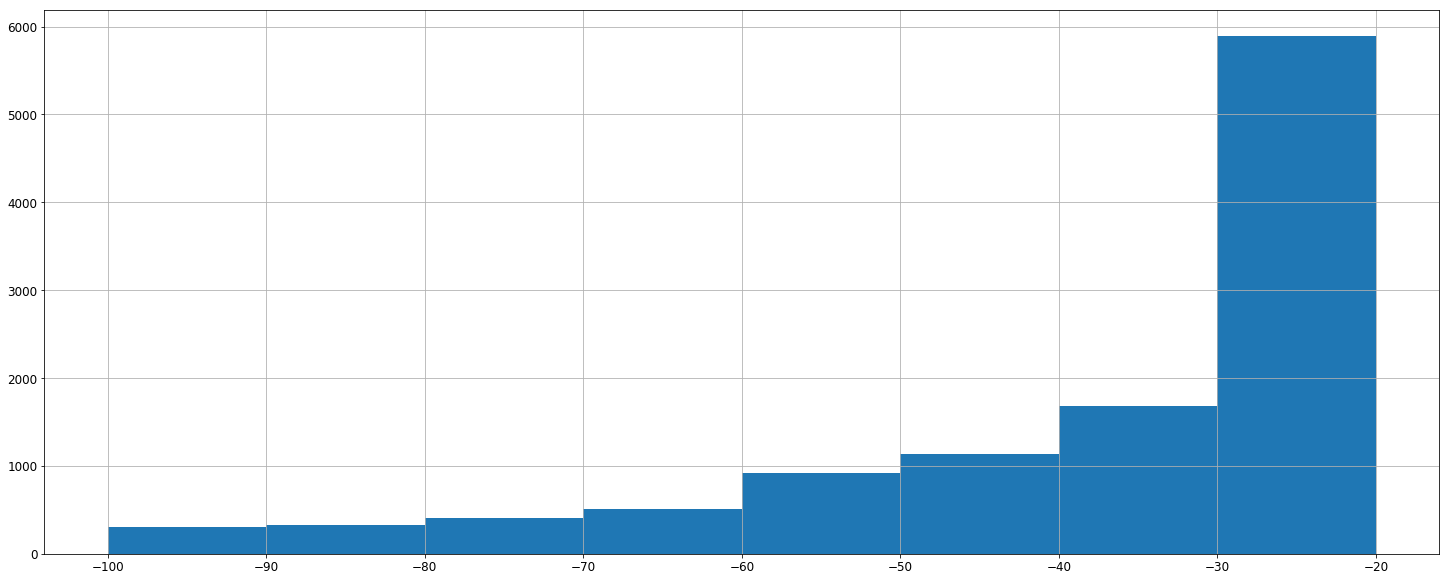

In [18]:
plt.hist(Power_delta, bins = 8 , range = (-100, -20))
plt.grid()

#### Observation (plot above): Many transitions in 20-100W range - likely due to light bulbs. Next look at the overall 100W-5kW range.

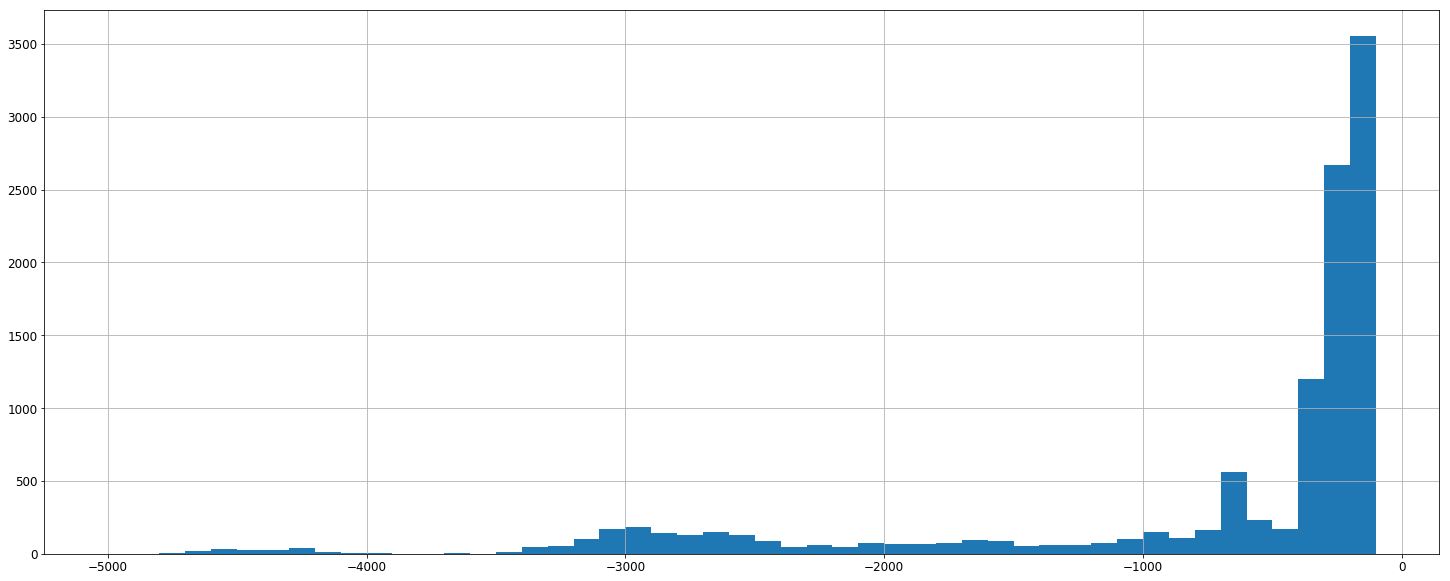

In [19]:
plt.hist(Power_delta, bins = 49 , range = (-5000,-100))
plt.grid()

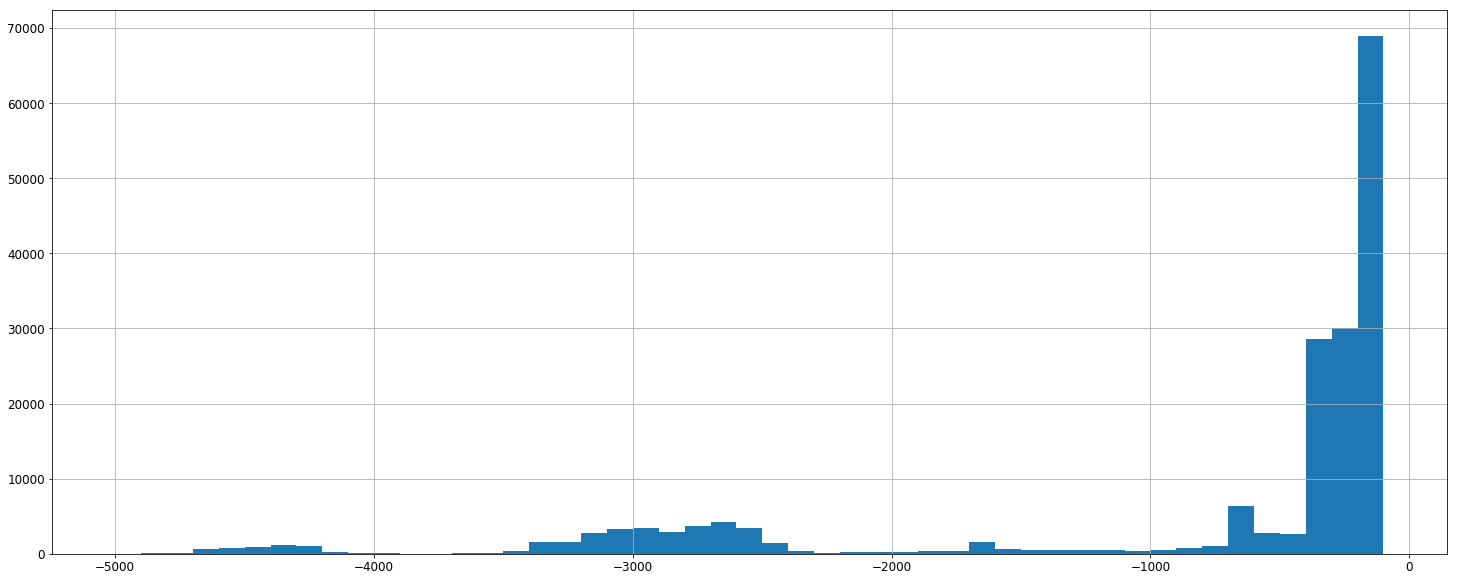

In [20]:
plt.hist(Power_delta_trans, bins = 49 , range = (-5000,-100))
plt.grid()

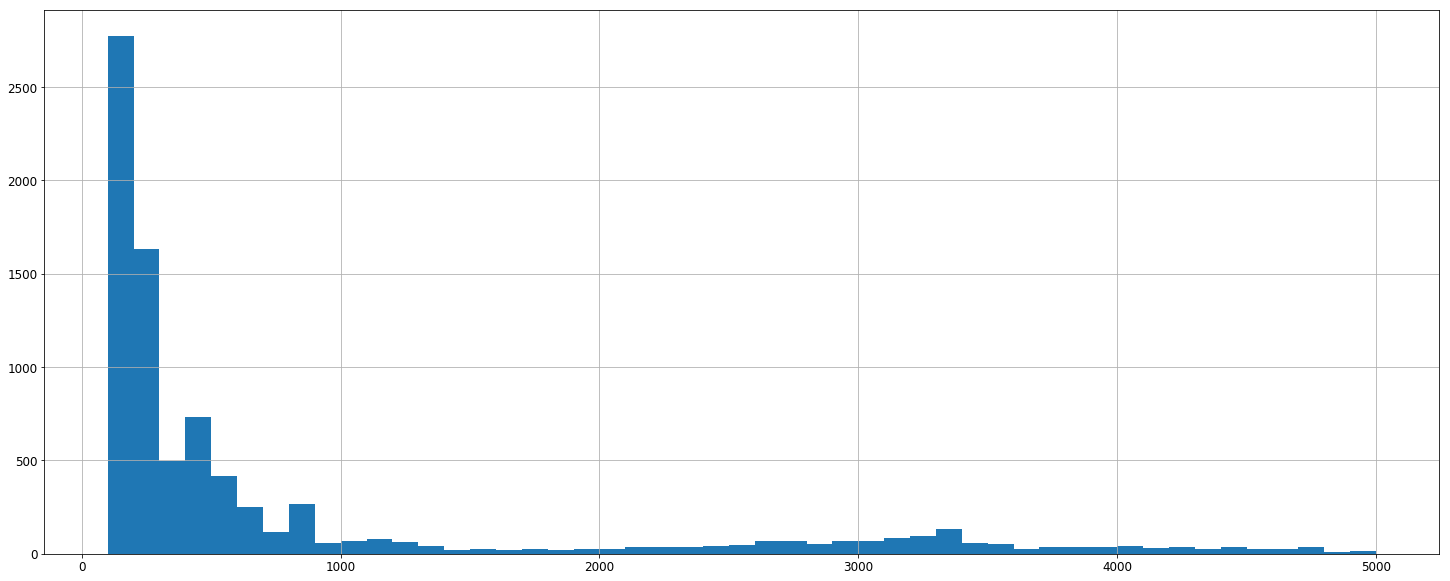

In [21]:
plt.hist(Power_delta, bins = 49 , range = (100,5000))
plt.grid()

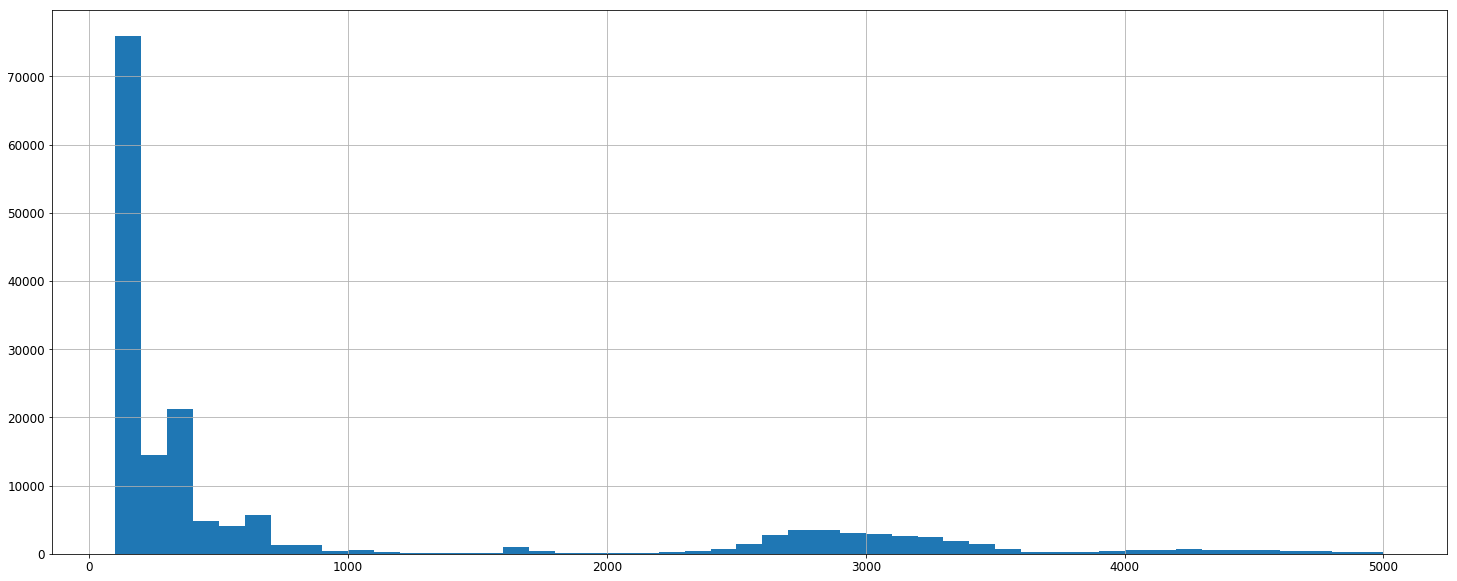

In [22]:
plt.hist(Power_delta_trans, bins = 49 , range = (100,5000))
plt.grid()

#### Observation: As expected, immediate transitions are noisier than post-transient transitions (due to overshoot)

#### Observation (plots above): Analyze plot above to find thresholds and typical values for transitions for four main appliances: AC2 - in 4kW range, AC1 - in 2.5kW range, pool pump - in 1.5kW rang, fridge - in 200W range. Note: pool pump transitions occur daily at fixed times, which helps in the analysis.

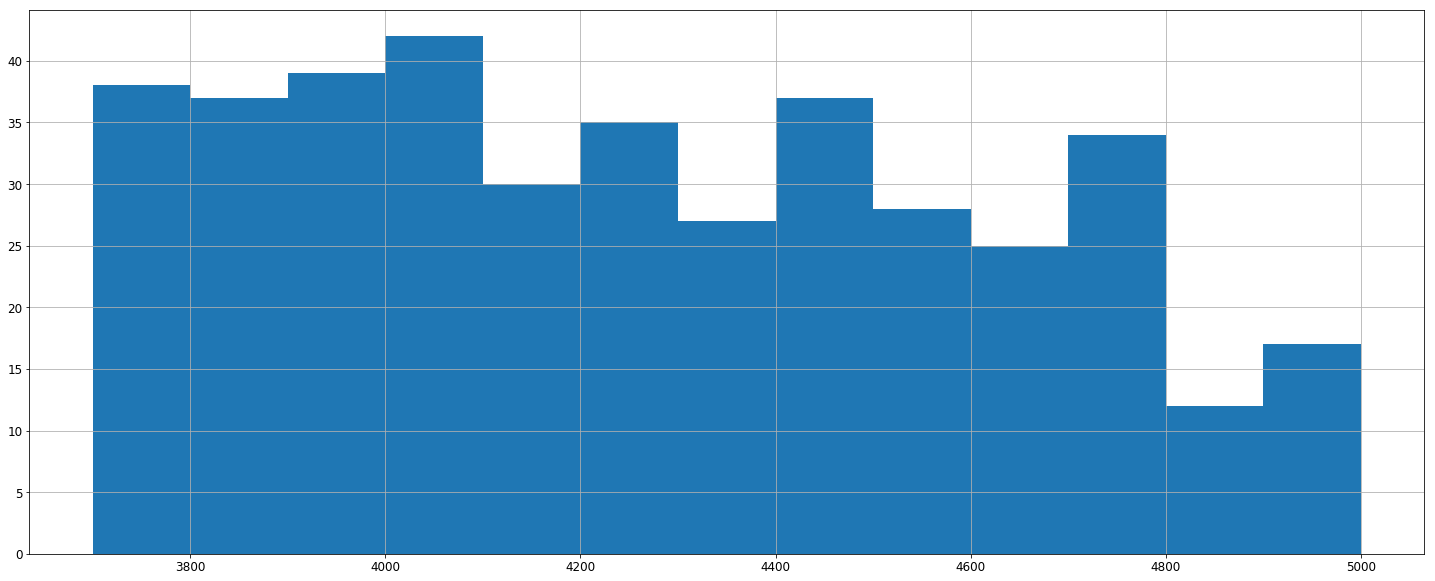

In [23]:
plt.hist(Power_delta, bins = 13 , range = (3700, 5000))
plt.grid()

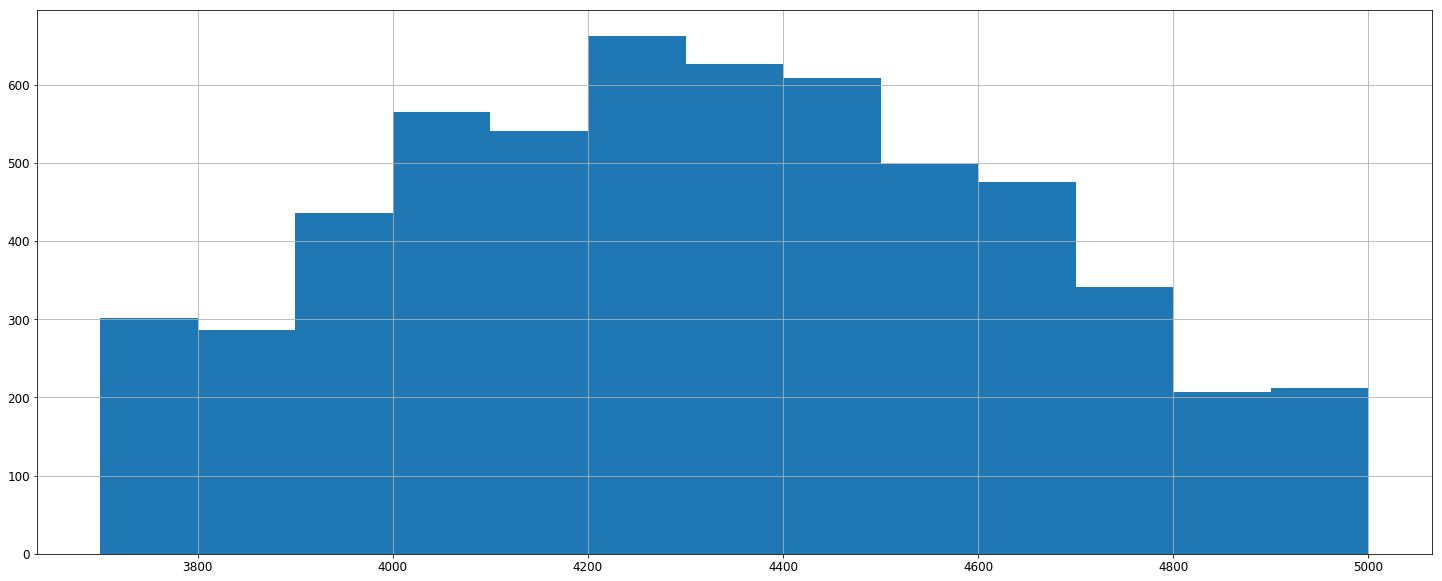

In [24]:
plt.hist(Power_delta_trans, bins = 13 , range = (3700, 5000))
plt.grid()

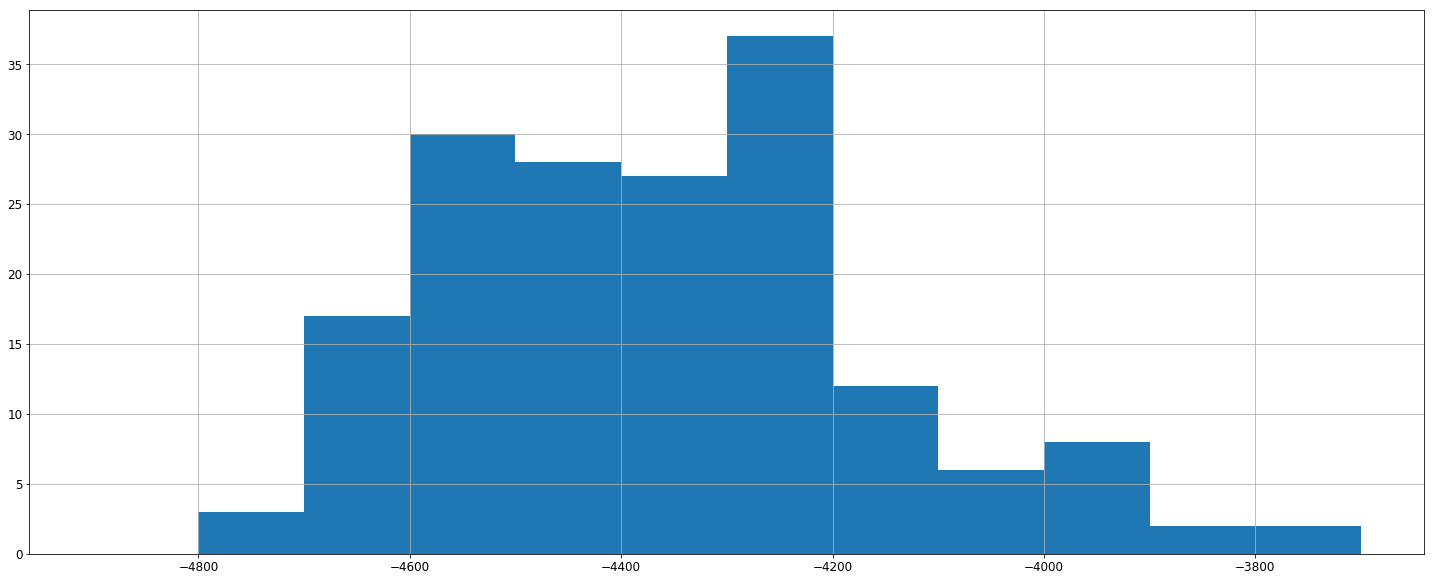

In [25]:
plt.hist(Power_delta, bins = 12 , range = (-4900, -3700))
plt.grid()

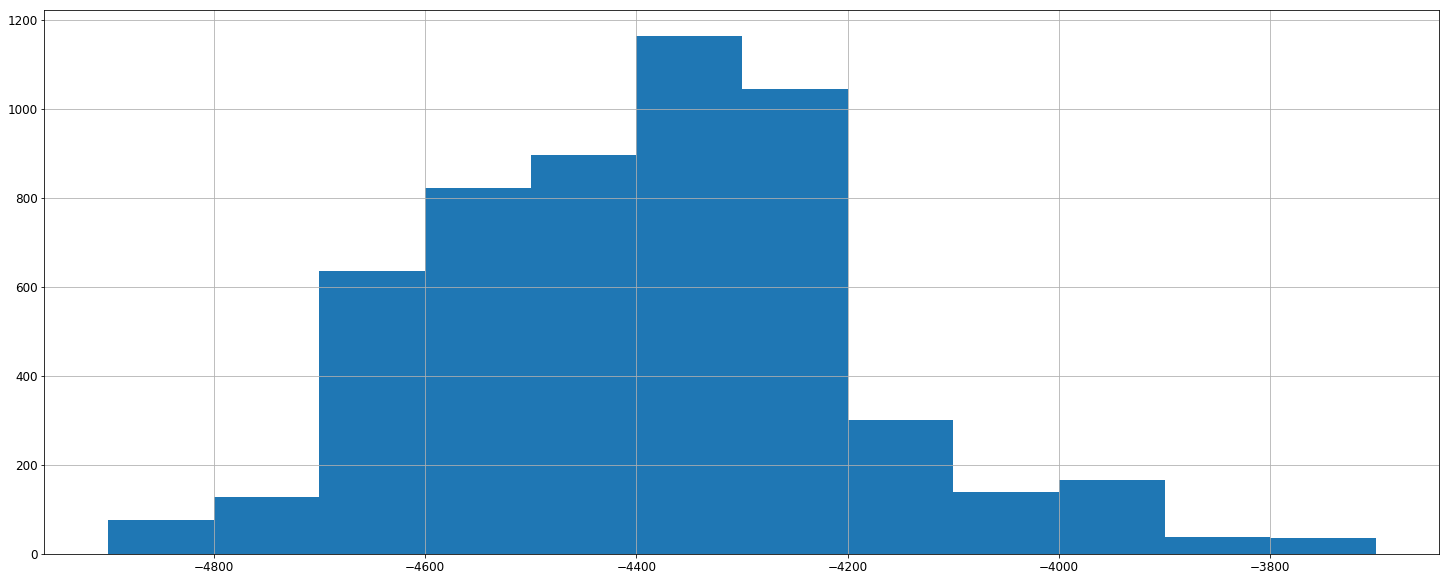

In [26]:
plt.hist(Power_delta_trans, bins = 12 , range = (-4900, -3700))
plt.grid()

#### Observation (plot above): Transition threshold for AC2 is ~3.9kW with typical transient value ~4.3kW

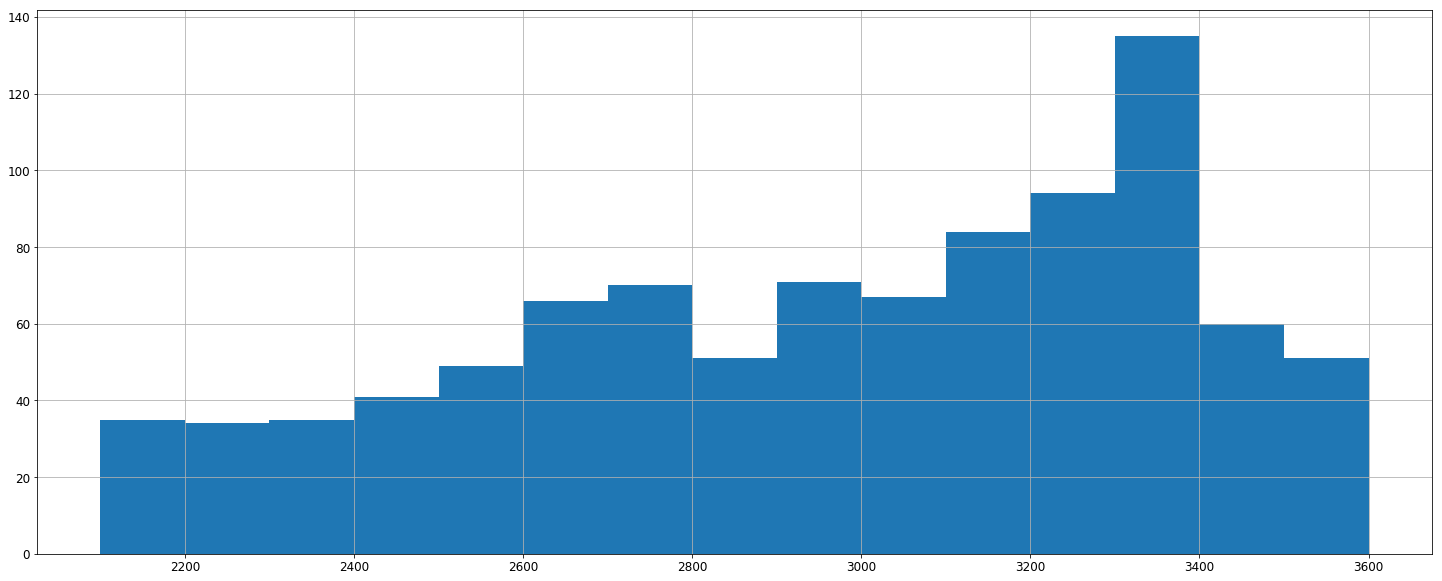

In [27]:
plt.hist(Power_delta, bins = 15 , range = (2100, 3600))
plt.grid()

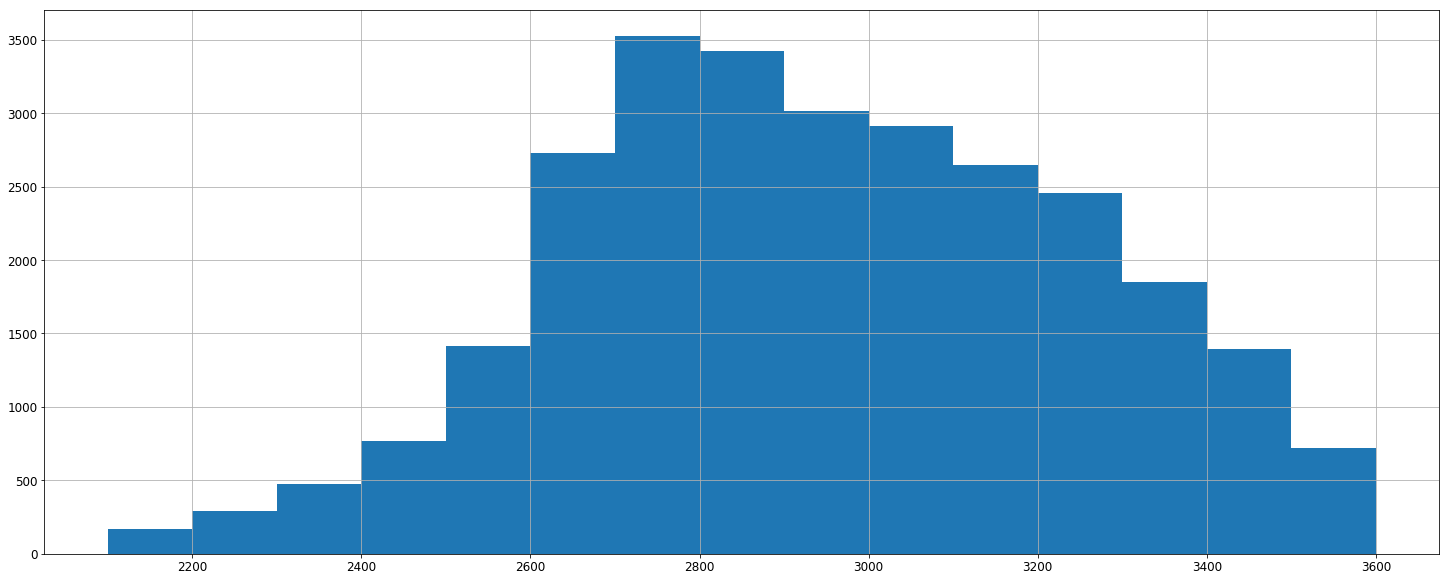

In [28]:
plt.hist(Power_delta_trans, bins = 15 , range = (2100, 3600))
plt.grid()

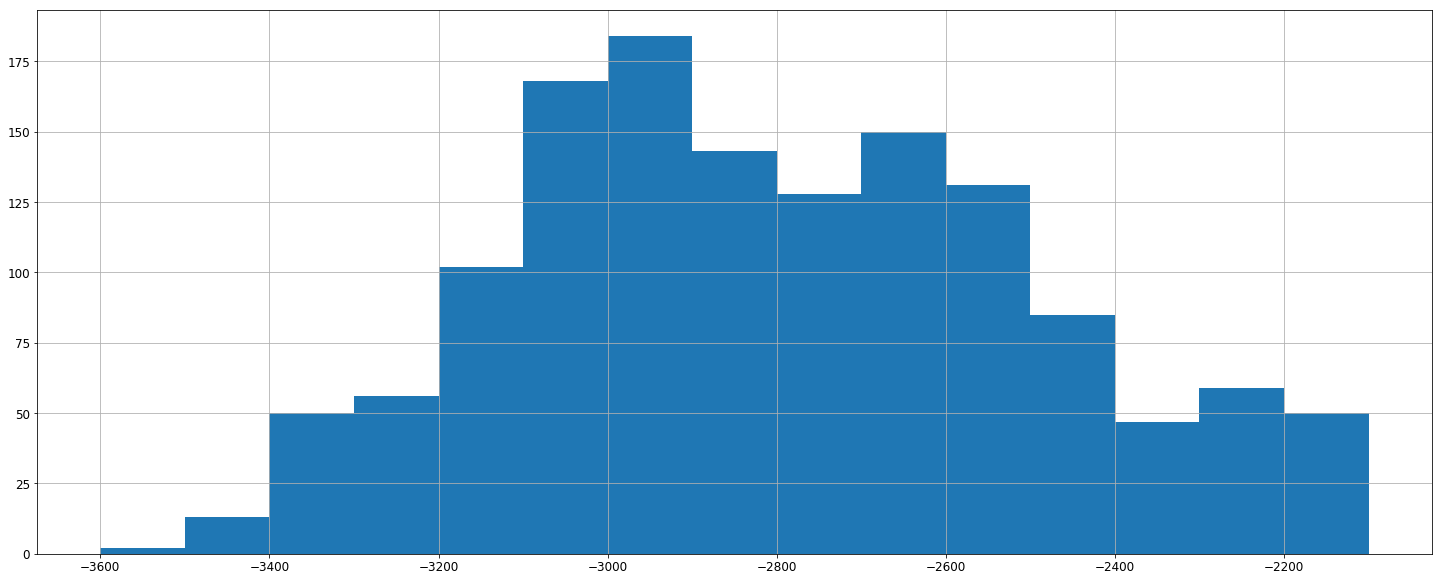

In [29]:
plt.hist(Power_delta, bins = 15 , range = (-3600, -2100))
plt.grid()

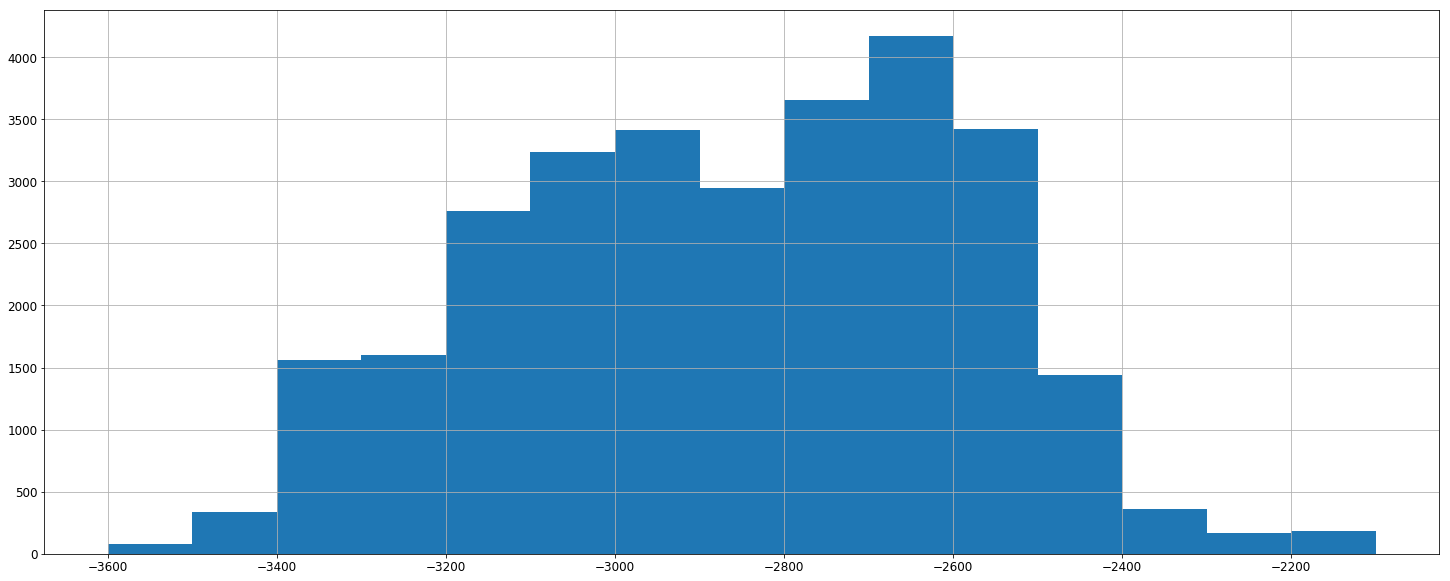

In [30]:
plt.hist(Power_delta_trans, bins = 15 , range = (-3600, -2100))
plt.grid()

#### Observation (plot above): Transition threshold for AC1 is ~2.4kW with typical post-transient value ~2.8kW

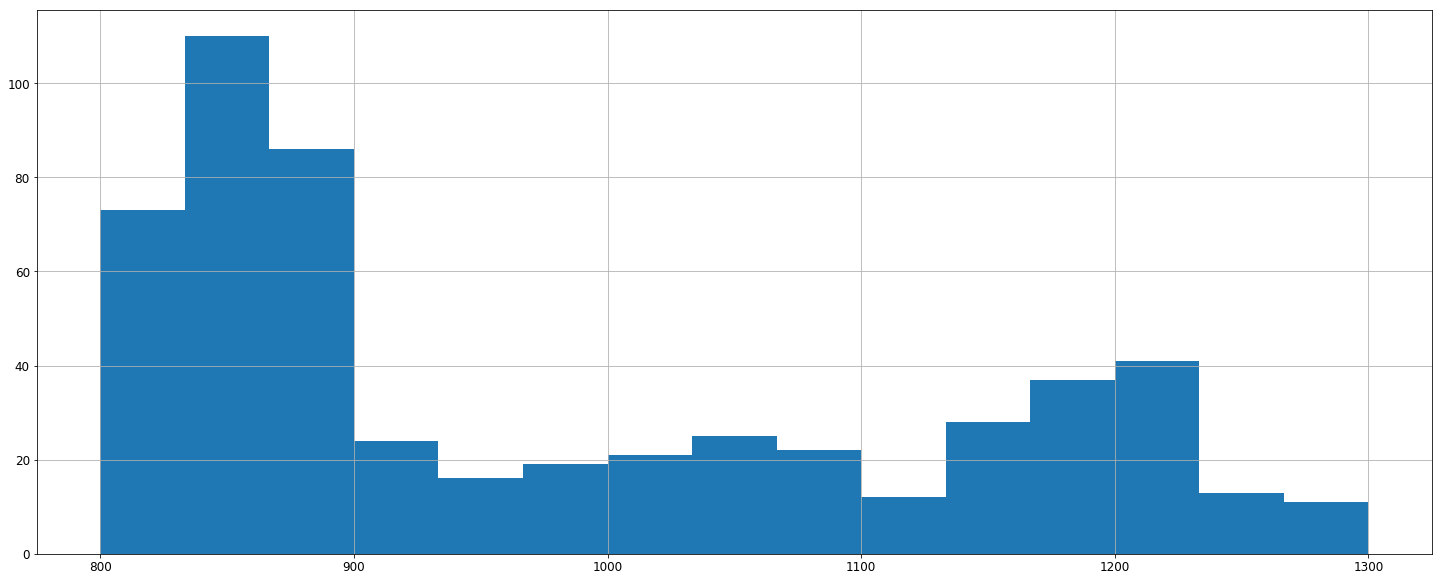

In [31]:
plt.hist(Power_delta, bins = 15 , range = (800, 1300))
plt.grid()

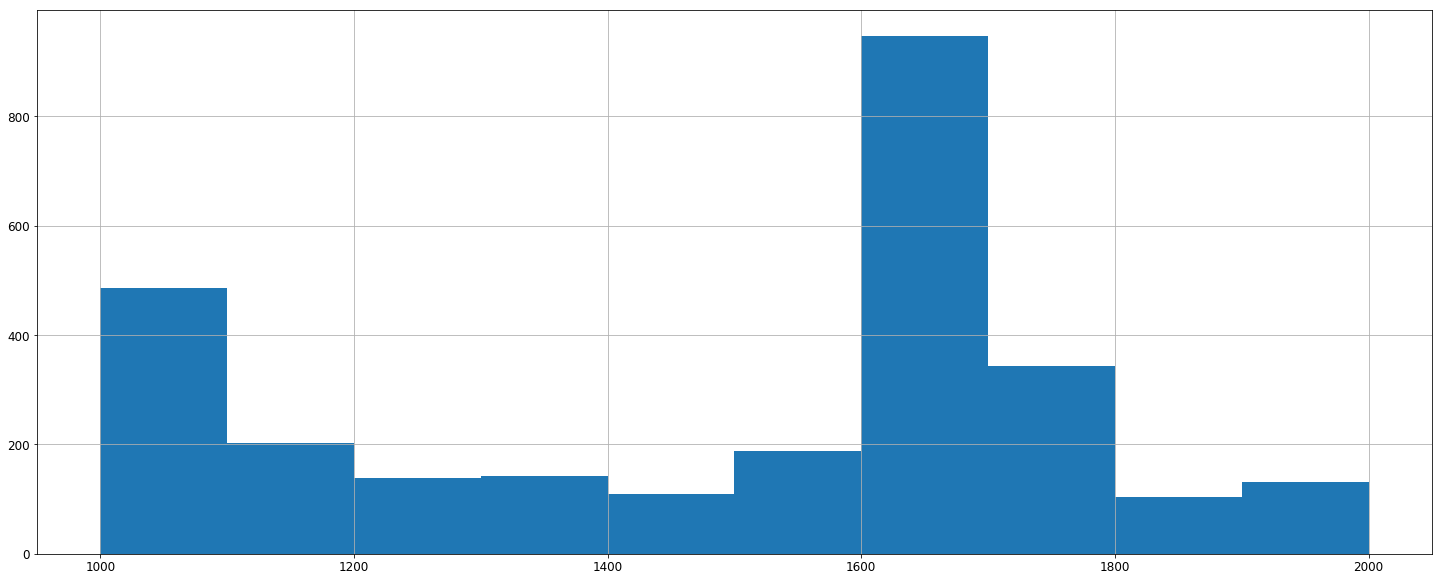

In [32]:
plt.hist(Power_delta_trans, bins = 10 , range = (1000, 2000))
plt.grid()

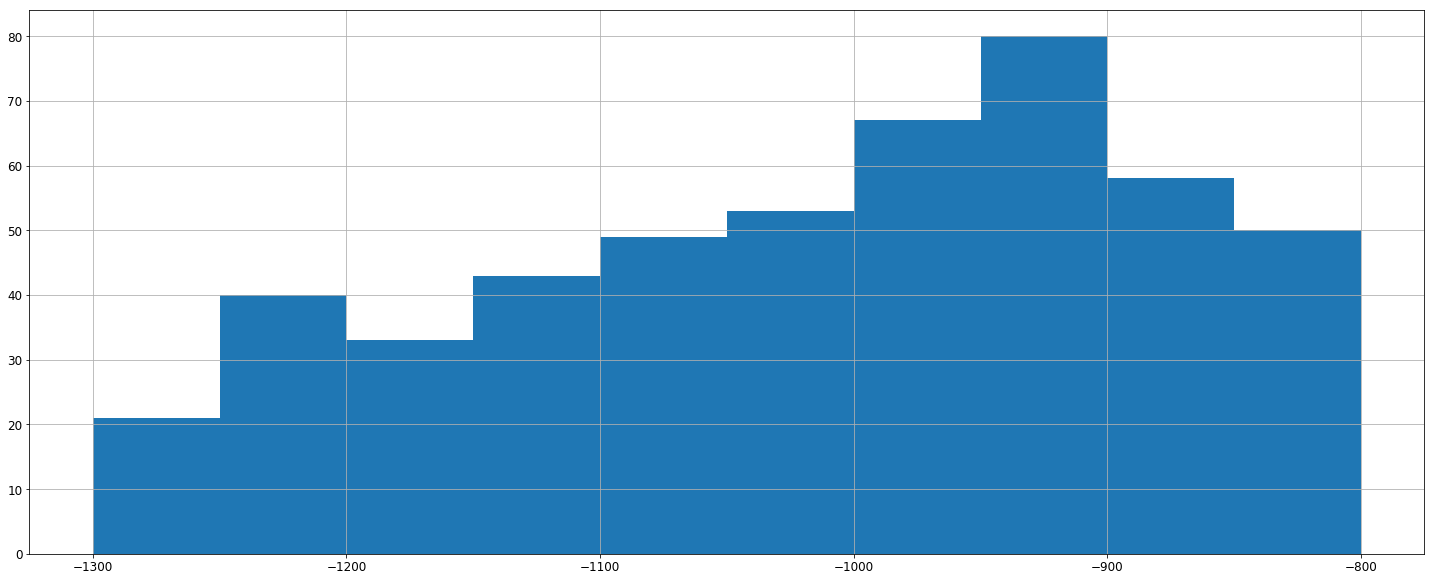

In [33]:
plt.hist(Power_delta, bins = 10 , range = (-1300, -800))
plt.grid()

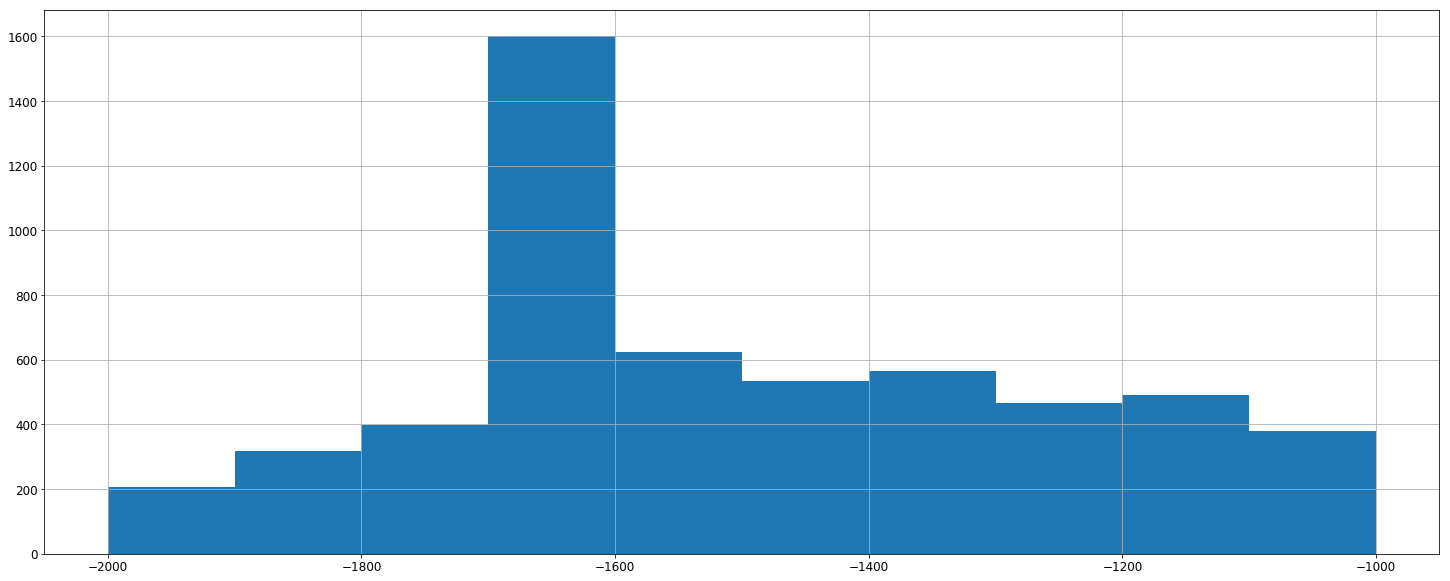

In [34]:
plt.hist(Power_delta_trans, bins = 10 , range = (-2000, -1000))
plt.grid()

#### Observation (plot above): Transition threshold for pump is ~0.9kW with typical post-transient value ~1.6kW

15.538315773010254s


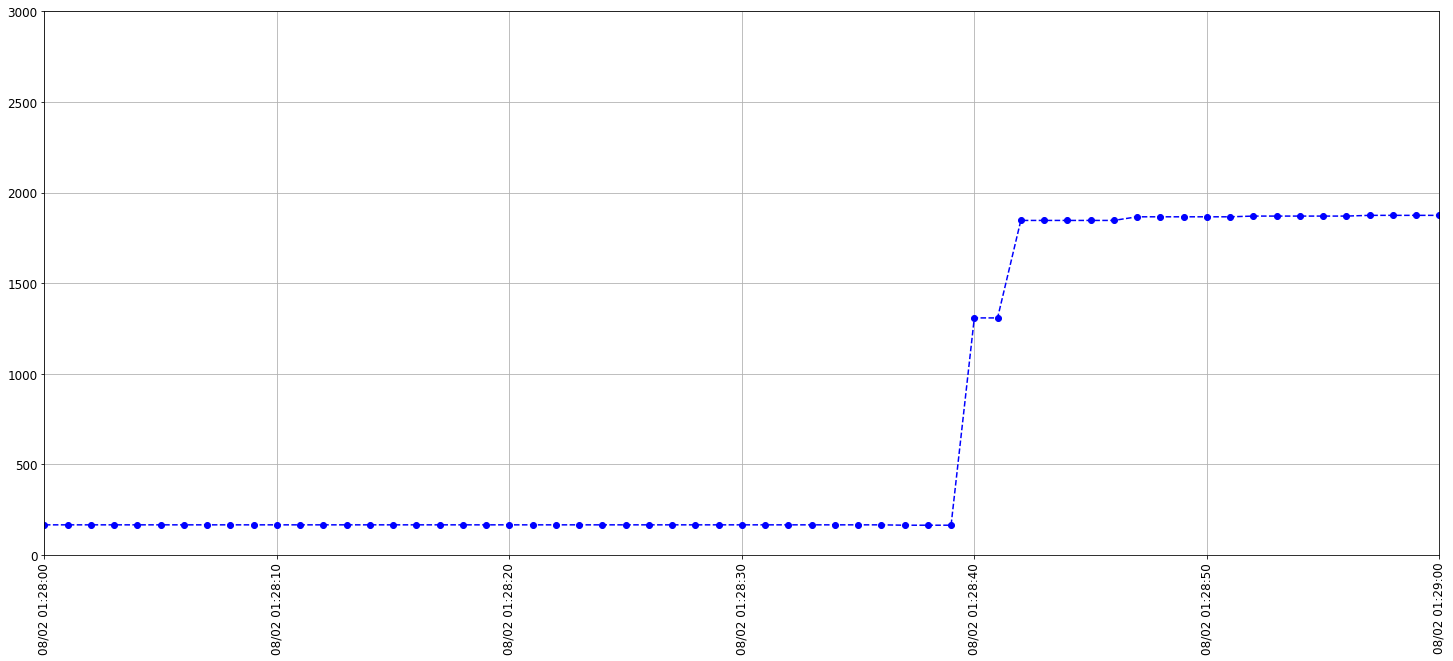

In [35]:
import datetime

import time
start = time.time() # start timer to measure execution time

fig, ax = plt.subplots()
plt.plot(dates, Power, linestyle='--', marker='o', color = 'blue')
plt.grid()
ax.set_xlim([datetime.datetime(2011, 8, 2, 1, 28, 0), datetime.datetime(2011, 8, 2, 1, 29, 0)])
ax.set_ylim([0, 3000])
ax.xaxis.set_major_formatter(dfmt)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )
#ax.axhline(y=500, color='r')

end = time.time() # stop timer to measure execution time
print(str(end - start) + 's') 

#### Observation (plot above): Note that pool pump post-transition values are higher than immediate transitions, because pump turns on/off slowly.

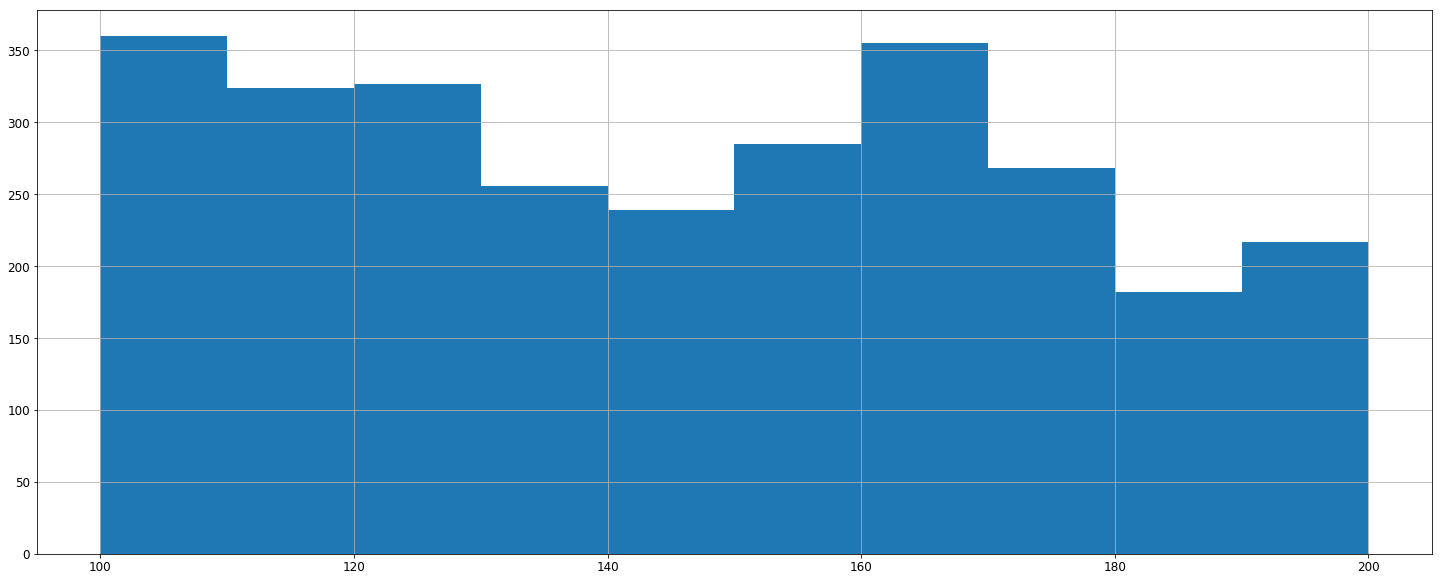

In [36]:
plt.hist(Power_delta, bins = 10 , range = (100, 200))
plt.grid()

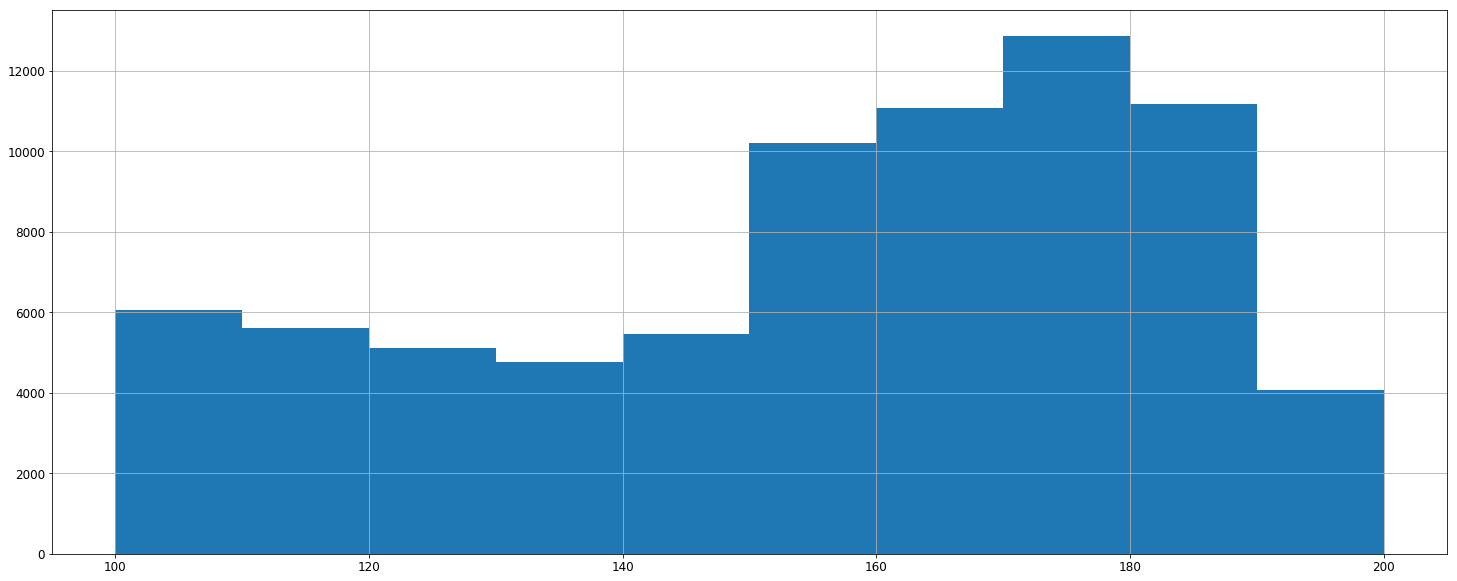

In [37]:
plt.hist(Power_delta_trans, bins = 10 , range = (100, 200))
plt.grid()

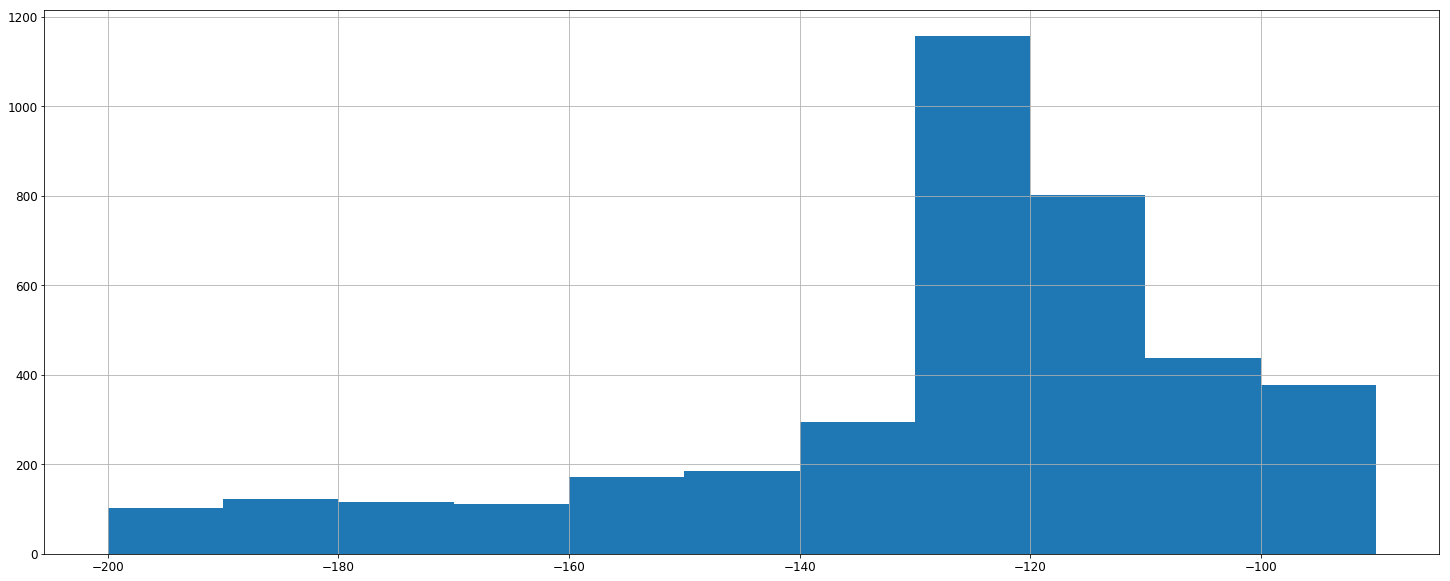

In [38]:
plt.hist(Power_delta, bins = 11 , range = (-200, -90))
plt.grid()

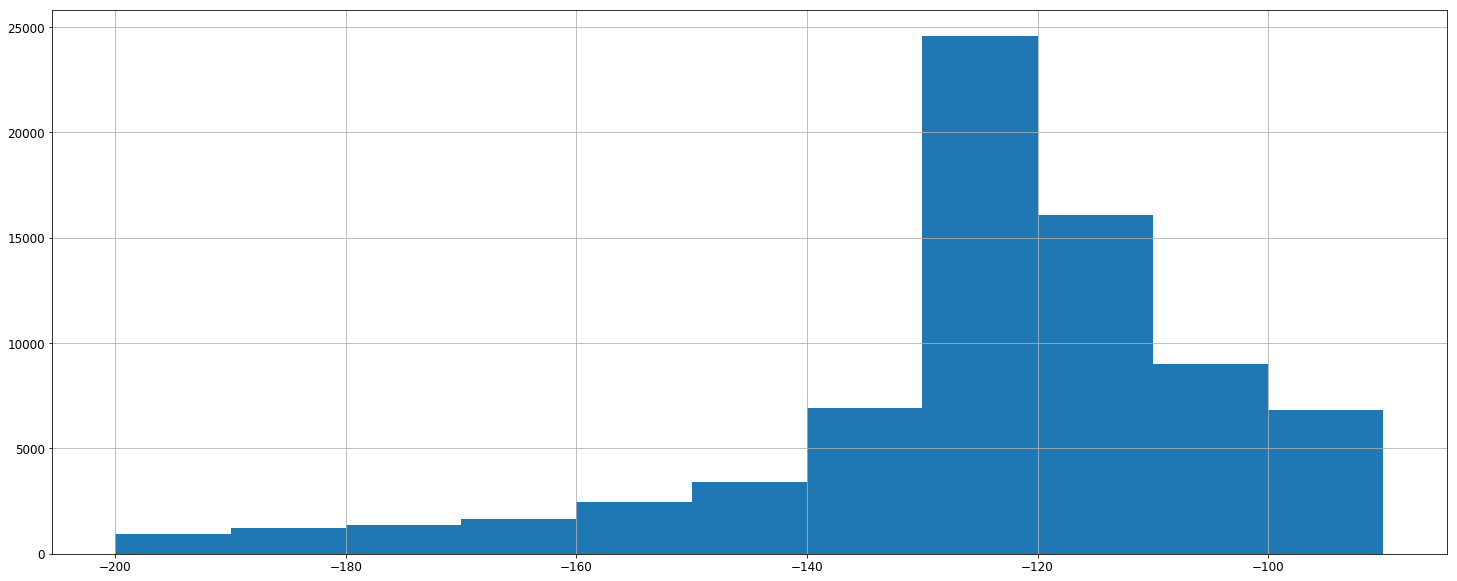

In [39]:
plt.hist(Power_delta_trans, bins = 11 , range = (-200, -90))
plt.grid()

#### Further zoom-in on the range in plot above

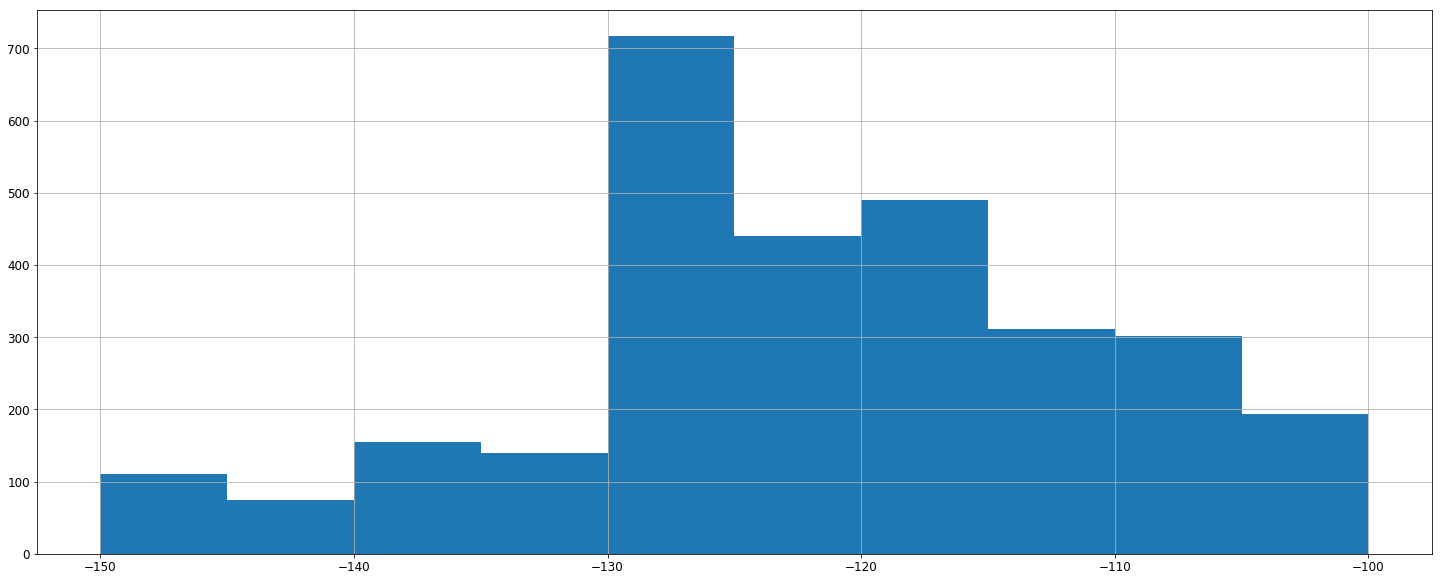

In [40]:
plt.hist(Power_delta, bins = 10 , range = (-150, -100))
plt.grid()

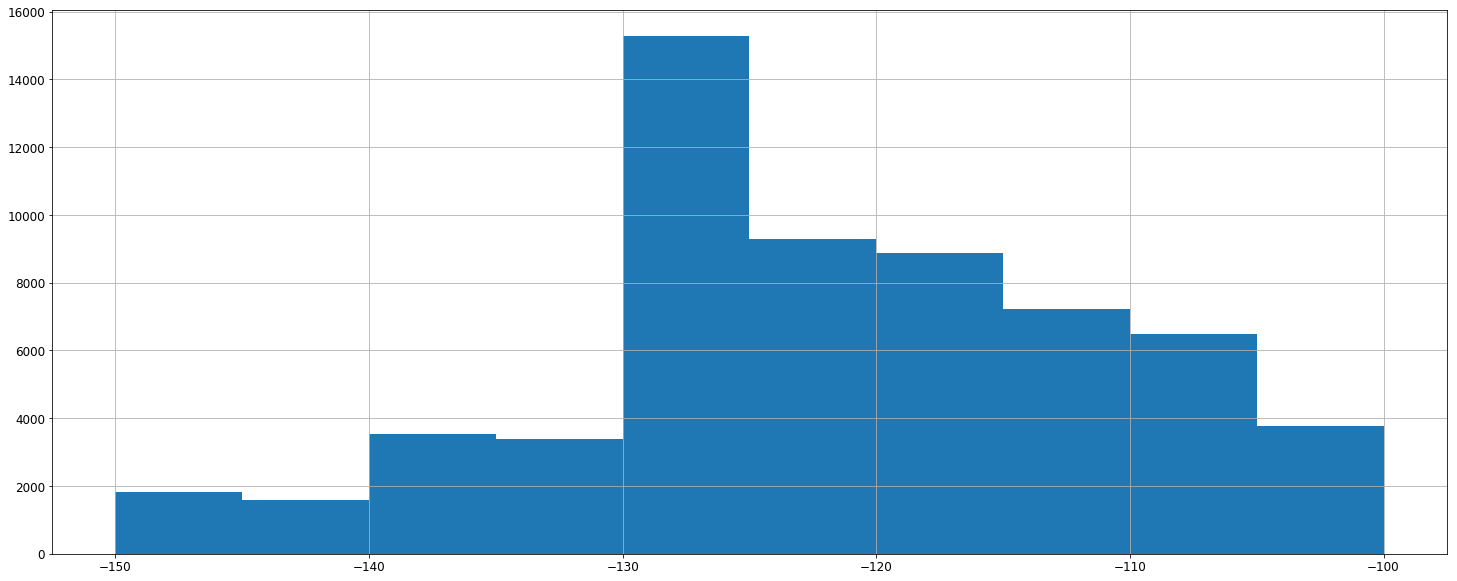

In [41]:
plt.hist(Power_delta_trans, bins = 10 , range = (-150, -100))
plt.grid()

#### Observation (plot above): Transition threshold for fridge is ~100W with typical post-transition value ~130W

### Define a simple model for power consumption time series of the four main appliances

#### Step 1: Using analysis above define Typical Power (TP) consumption values for four main appliances

In [42]:
# Typical values from post-transient delta analysis above
AC2_TP = 4300
AC1_TP = 2800
PP_TP = 1600
FR_TP = 130

BKGD = 500 # this is background power consumption in addition to four main appliances,
           # chosen somewhat arbitrary, should be probably found separately for every day

#### Step 2: Define 16 (2^4) power thresholds for total power consumption, based on all combination of thresholds for 4 main appliances and background power.

In [43]:
# Define combinations in such a way that ON_OFF_TH values are monotonically increasing (no need to sort)
list1 = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])
list2 = np.array([0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1])
list3 = np.array([0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1])
list4 = np.array([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1])

ON_OFF_TH = list1*AC2_TP + list2*AC1_TP + list3*PP_TP + list4*FR_TP + BKGD
print('Power thresholds are: ' + str(ON_OFF_TH))

Power thresholds are: [ 500  630 2100 2230 3300 3430 4900 5030 4800 4930 6400 6530 7600 7730 9200
 9330]


In [44]:
sorted(ON_OFF_TH) # sorted thresholds, just FYI

[500,
 630,
 2100,
 2230,
 3300,
 3430,
 4800,
 4900,
 4930,
 5030,
 6400,
 6530,
 7600,
 7730,
 9200,
 9330]

Step 3: Map total power consumption on the 16 thresholds defined above: extract index of the combination and find the power value for the individual appliance consumption, using lists (list1, list2, list3, list4) above. Use typical power values (TP) defined above

In [45]:
AC2_Power = np.empty(shape =(len(data), 1), dtype = 'int64')
AC1_Power = np.empty(shape =(len(data), 1), dtype = 'int64')
PP_Power = np.empty(shape =(len(data), 1), dtype = 'int64')
FR_Power = np.empty(shape =(len(data), 1), dtype = 'int64')

import time
start = time.time()

for j in range(0,len(data)):
    index = 0
    #min_delta = 1000000 # initialize to a very large value

    for i in range(15,-1, -1):
        delta = Power[j] - ON_OFF_TH[i]
        if delta >=0:
            #min_delta = delta
            index = i
            break
    
    AC2_Power[j] = list1[index] * AC2_TP
    AC1_Power[j] = list2[index] * AC1_TP
    PP_Power[j] = list3[index] * PP_TP
    FR_Power[j] = list4[index] * FR_TP

end = time.time()
print(end - start)    

30.236398696899414


In [46]:
# Inspect first 10 power values
for i in range(0,10):
    print(str(AC1_Power[i]) + " " + str(AC2_Power[i]) + " " + str(PP_Power[i]) + " " + str(FR_Power[i]))

[0] [0] [0] [130]
[0] [0] [0] [130]
[0] [0] [0] [130]
[0] [0] [0] [130]
[0] [0] [0] [130]
[0] [0] [0] [130]
[0] [0] [0] [130]
[0] [0] [0] [130]
[0] [0] [0] [130]
[0] [0] [0] [130]


### Plot individual appliance power consumption vs actual total on a random day

68.65828728675842s


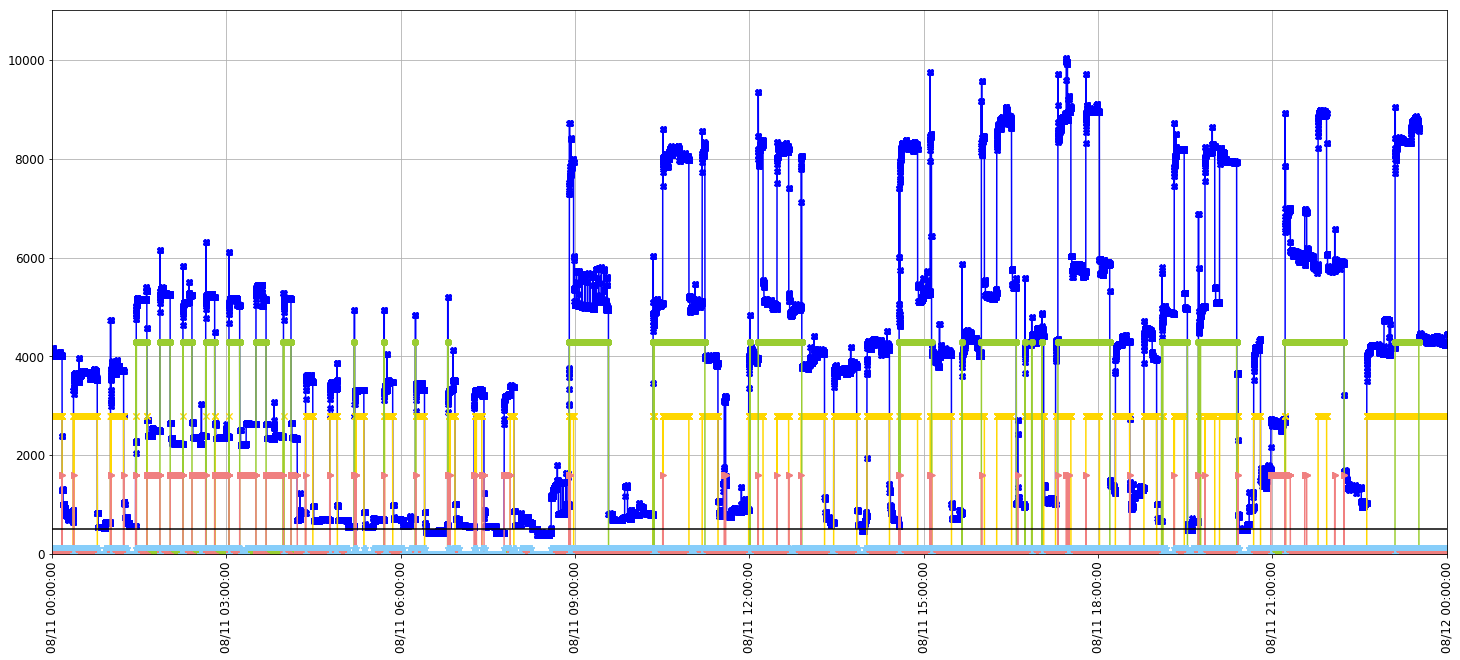

In [47]:
import time
start = time.time()

import datetime

fig, ax = plt.subplots()
plt.plot(dates, Power, linestyle='-', marker='X', color = 'blue')
plt.plot(dates, AC1_Power, linestyle='-', marker='x', color = 'gold') # ~10min runs
plt.plot(dates, AC2_Power, linestyle='-', marker='o', color = 'yellowgreen') # ~30min runs
plt.plot(dates, PP_Power, linestyle='-', marker='>', color = 'lightcoral')
plt.plot(dates, FR_Power, linestyle='-', marker='*', color = 'lightskyblue')
plt.grid()
ax.set_xlim([datetime.datetime(2011, 8, 11, 0, 0, 0), datetime.datetime(2011, 8, 12, 0, 0, 0)])
ax.set_ylim([0, 11000])
ax.xaxis.set_major_formatter(dfmt)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )
ax.axhline(y=BKGD, color='k') # background consumption

end = time.time() # stop timer to measure execution time
print(str(end - start) + 's') 

#### Observation: On the plot above, the model captures mostly correctly the daily 3hr pool pump run, but also generates false positive pool pump turn-ons later in the day (at overshoot times), which overestimates the overall pump energy consumption.

### Energy consumption by source over the whole month
#### Note 1: Energy is the integral of power, summing all power readings one gets energy in W x sec (divide by 3.6E6 to get kW*hrs)
#### Note 2: Background consumption included in Other

(-1.1185130248693418,
 1.1008816124860576,
 -1.1105256879596159,
 1.1088598915795591)

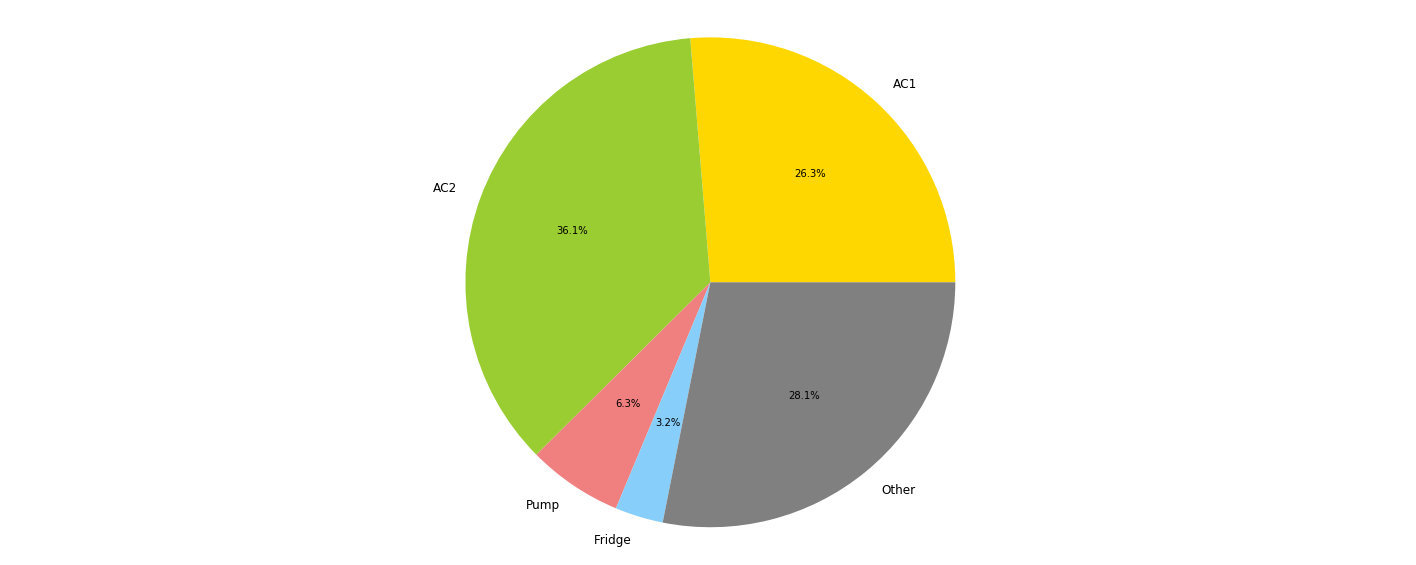

In [48]:
Total_Cons = sum(Power)
AC2 = int(sum(AC2_Power))
AC1 = int(sum(AC1_Power))
Pump = int(sum(PP_Power))
Fridge = int(sum(FR_Power))
Other = Total_Cons - AC2 - AC1 - Pump - Fridge

labels = ['AC1', 'AC2', 'Pump', 'Fridge', 'Other']
sizes = [AC1, AC2, Pump, Fridge, Other]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gray']
 
#plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.axis('equal')

### Observation (plot above): Four main power appliances account for 72% of all energy consumption